In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
mobility_df = pd.read_csv('차량 연비 데이터(2002~2022).csv')

In [8]:
# 클래스 명 통일
mobility_df['VEHICLE CLASS'] = mobility_df['VEHICLE CLASS'].str.replace('-', '').str.upper().str.replace(':','').str.replace(' ','')

# 클래스 별 그룹화
mobility_df['CLASS GROUP'] = mobility_df['VEHICLE CLASS'].replace({
'SUBCOMPACT' : 'CAR',
'MINICOMPACT' : 'CAR',
'COMPACT' : 'CAR',
'MIDSIZE' : 'CAR',
'FULLSIZE' : 'CAR',
'TWOSEATER' : 'CAR',
'SUV' : 'SUV',
'SUVSMALL' : 'SUV',
'SUVSTANDARD' : 'SUV',
'PICKUPTRUCKSTANDARD' : 'TRUCK',
'PICKUPTRUCKSMALL' : 'TRUCK',
'VANCARGO' : 'VAN',
'VANPASSENGER' : 'VAN',
'MINIVAN' : 'VAN',
'STATIONWAGONSMALL' : 'WAGON',
'STATIONWAGONMIDSIZE' : 'WAGON',
'SPECIALPURPOSEVEHICLE' : 'SPECIAL'
})

# 연비를 km/L로 변환
mobility_df['CITY (km/L)'] = (100 / mobility_df['CITY (L/100 km)']).round(2)
mobility_df['HWY (km/L)'] = (100 / mobility_df['HWY (L/100 km)']).round(2)
mobility_df['COMB (km/L)'] = (100 / mobility_df['COMB (L/100 km)']).round(2)

# 제조사 명 대문자로 통일
mobility_df['MAKE'] = mobility_df['MAKE'].str.upper().str.replace('-','').str.replace(' ','')

# 연료 이름 변경
mobility_df['FUEL'] = mobility_df['FUEL'].replace({
'X' : 'Gasoline',
'Z' : 'Premium',
'D' : 'Diesel',
'E' : 'Ethanol',
'N' : 'Natural Gas'
})

# 엔진 사이즈 그룹화
mobility_df['ENGINE GROUP'] = mobility_df['ENGINE SIZE'].map(lambda x: '0~1' if x < 1
else('1~2' if x < 2
else('2~3' if x < 3
else('3~4' if x < 4
else('4~5' if x < 5
else('5~6' if x < 6
else('6~7' if x < 7
else'7~')))))))

# 엔진 사이즈 상위 하위 20% 그룹화
mobility_df['ENGINE SML'] = mobility_df['ENGINE SIZE'].map(lambda x: 'SMALL(bottom 20%)' if x <= 2
else ('MIDDLE' if x < 4.6
else 'LARGE(top 20%)'))

# 실린더 상위 하위 20% 그룹화
mobility_df['CYLINDERS GROUP'] = mobility_df['CYLINDERS'].map(lambda x: 'LOWER' if x <= 4
else ('MIDDLE' if x < 8
else 'UPPER'))


# 디젤게이트 구분: RED-연루 YELLOW-의혹 GREEN-청렴
mobility_df['DIESEL GATE'] = mobility_df['MAKE'].replace({
'CHEVROLET': 'GREEN',
'FORD' : 'GREEN',
'BMW' : 'RED',
'GMC' : 'GREEN',
'MERCEDESBENZ' : 'RED',
'TOYOTA' : 'YELLOW',
'PORSCHE' : 'RED',
'DODGE' : 'RED',
'AUDI' : 'RED',
'NISSAN' : 'YELLOW',
'VOLKSWAGEN' : 'RED ',
'MAZDA' : 'YELLOW',
'HYUNDAI' : 'YELLOW',
'HONDA' : 'YELLOW',
'JEEP' : 'RED',
'KIA' : 'YELLOW',
'SUBARU' : 'YELLOW',
'VOLVO' : 'GREEN',
'LEXUS' : 'YELLOW',
'CADILLAC' : 'GREEN',
'CHRYSLER' : 'RED',
'MINI' : 'GREEN',
'JAGUAR' : 'GREEN',
'MITSUBISHI' : 'YELLOW',
'INFINITI' : 'YELLOW',
'BUICK' : 'GREEN',
'PONTIAC' : 'GREEN',
'ACURA' : 'YELLOW',
'LINCOLN' : 'GREEN',
'SUZUKI' : 'YELLOW',
'SAAB' : 'GREEN',
'LANDROVER' : 'GREEN',
'SATURN' : 'GREEN',
'RAM' : 'RED',
'MASERATI' : 'RED',
'BENTLEY' : 'RED',
'LAMBORGHINI' : 'RED',
'ROLLSROYCE' : 'GREEN',
'ASTONMARTIN' : 'GREEN',
'FIAT' : 'RED',
'FERRARI' : 'GREEN',
'SCION' : 'GREEN',
'GENESIS' : 'GREEN',
'ALFAROMEO' : 'GREEN',
'OLDSMOBILE' : 'GREEN',
'DAEWOO' : 'GREEN',
'SMART' : 'GREEN',
'HUMMER' : 'GREEN',
'ISUZU' : 'GREEN',
'BUGATTI' : 'RED',
'SRT' : 'GREEN',
'PLYMOUTH' : 'GREEN'
})

# TRANSMISSION 컬럼 prefix(변속기 종류), gear(기어 수) 컬럼으로 분할
mobility_df["PREFIX"] = mobility_df["TRANSMISSION"].str.extract(r"([A-Z]+)")
mobility_df["GEAR"] = mobility_df["TRANSMISSION"].str.extract(r"(\d+)").astype(float)

# 차량 나이
mobility_df['CAR AGE'] = 2022 - mobility_df['YEAR']

# 열 순서 정리
mobility_df = mobility_df[['YEAR' , 'CAR AGE', 'MAKE', 'DIESEL GATE', 'CLASS GROUP', 'VEHICLE CLASS', 'ENGINE SML', 'ENGINE GROUP', 'ENGINE SIZE', 'CYLINDERS GROUP', 'CYLINDERS', 'TRANSMISSION', "PREFIX", "GEAR", 'FUEL', 'CITY (km/L)', 'HWY (km/L)', 'COMB (km/L)', 'COMB (mpg)', 'EMISSIONS']]

# 연료, 그룹별 색깔 지정
palette_ip = {
    "Gasoline": "#4C72B0",
    "Premium": "#DD8452",
    "Ethanol": "#55A868",
    "Natural Gas": "#C44E52",
    "Diesel": "#8C8C8C",
    "SUV": "#8172B3",
    "TRUCK": "#DA8BC3",
    "WAGON": "#937860",
    "SPECIAL": "#E2A458",
    "CAR": "#64B5CD",
    "VAN": "#4E9A06"
}

#### 제조사별 연비 & 배출량 평균

In [9]:

make_mean = mobility_df.groupby("MAKE").agg(
    mean_comb=("COMB (km/L)", "mean"),
    mean_emis=("EMISSIONS", "mean")
).reset_index()

make_mean.head(10)

,MAKE,mean_comb,mean_emis
0,ACURA,10.789028,219.599190
1,ALFAROMEO,10.498095,228.119048
2,ASTONMARTIN,7.048962,332.188679
3,AUDI,9.640907,247.595031
4,BENTLEY,6.250847,375.652542
5,BMW,9.511228,250.785235
6,BUGATTI,4.353333,538.250000
7,BUICK,9.906300,232.047619
8,CADILLAC,8.886429,264.313364
9,CHEVROLET,8.725075,269.999531


#### 제조사별 연비 & 배출량을 Z-Score 정규화

Z-Score = (x - mean) / std

In [10]:
avg_comb = make_mean['mean_comb'].mean()
std_comb = make_mean['mean_comb'].std()

avg_emis = make_mean['mean_emis'].mean()
std_emis = make_mean['mean_emis'].std()

make_mean['z_comb'] = (make_mean['mean_comb'] - avg_comb) / std_comb
make_mean['z_emis'] = (make_mean['mean_emis'] - avg_emis) / std_emis

make_mean.head(10)

,MAKE,mean_comb,mean_emis,z_comb,z_emis
0,ACURA,10.789028,219.599190,0.489410,-0.589667
1,ALFAROMEO,10.498095,228.119048,0.367875,-0.467927
2,ASTONMARTIN,7.048962,332.188679,-1.072977,1.019123
3,AUDI,9.640907,247.595031,0.009790,-0.189635
4,BENTLEY,6.250847,375.652542,-1.406384,1.640178
5,BMW,9.511228,250.785235,-0.044382,-0.144050
6,BUGATTI,4.353333,538.250000,-2.199058,3.963531
7,BUICK,9.906300,232.047619,0.120657,-0.411792
8,CADILLAC,8.886429,264.313364,-0.305388,0.049253
9,CHEVROLET,8.725075,269.999531,-0.372792,0.130503


#### 제조사별 성능 비교를 위한, 연비 & 배출량 z-score 정규화값 비교

- x축 : **연비**가 평균보다 높나 낮나
- y축 : **배출량**이 평균보다 높나, 낮나 

</br>

> **사분면 설명**
> 
> - 좌상단 : 저연비 고배출
> - 우상단 : 고연비 고배출
> - 좌하단 : 저연비 저배출
> - 우하단 : 고연비 저배출 **Best!**

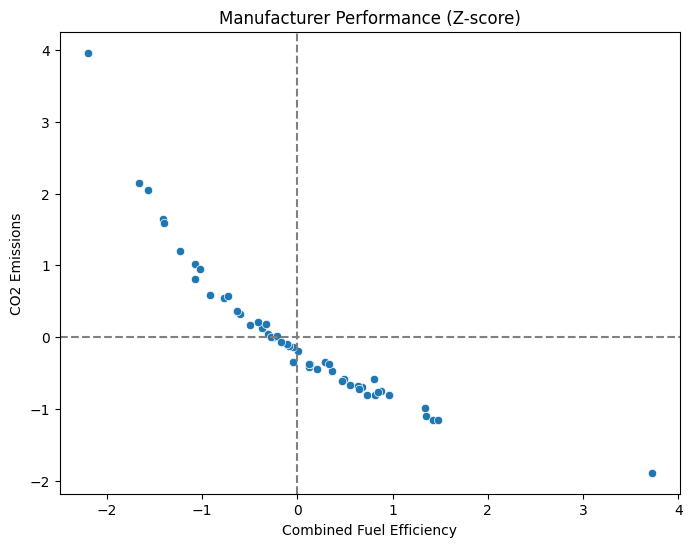

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="z_comb", y="z_emis", data=make_mean)

plt.axvline(0, color="gray", linestyle="--")
plt.axhline(0, color="gray", linestyle="--")

plt.title("Manufacturer Performance (Z-score)")
plt.xlabel("Combined Fuel Efficiency")
plt.ylabel("CO2 Emissions")
plt.show()

#### 우하단 제조사 리스트

`(연비 z-score > 0) AND (배출량 z-score < 0)`

In [12]:
best_make = make_mean[(make_mean["z_comb"] > 0) & (make_mean["z_emis"] < 0)]
print(best_make[["MAKE", "z_comb", "z_emis"]].round(2))


          MAKE  z_comb  z_emis
0        ACURA    0.49   -0.59
1    ALFAROMEO    0.37   -0.47
3         AUDI    0.01   -0.19
7        BUICK    0.12   -0.41
11      DAEWOO    0.73   -0.81
14        FIAT    1.35   -1.09
18       HONDA    1.34   -0.99
20     HYUNDAI    0.96   -0.81
25         KIA    0.88   -0.76
28       LEXUS    0.29   -0.34
31       MAZDA    0.67   -0.70
33        MINI    1.43   -1.15
34  MITSUBISHI    0.64   -0.68
35      NISSAN    0.34   -0.37
36  OLDSMOBILE    0.14   -0.37
38     PONTIAC    0.55   -0.66
42        SAAB    0.12   -0.38
43      SATURN    0.64   -0.73
44       SCION    1.47   -1.16
45       SMART    3.72   -1.89
47      SUBARU    0.47   -0.61
48      SUZUKI    0.82   -0.80
49      TOYOTA    0.80   -0.59
50  VOLKSWAGEN    0.85   -0.76
51       VOLVO    0.21   -0.44


#### 연비와 배출량을 함께 계산한 성능 점수
(우하단 제조사 한정)

`score = (연비 z-score) - (배출량 z-score)`


In [31]:
best_make['score'] = make_mean["z_comb"] - make_mean["z_emis"]
sorted_best_make = best_make.round(2).sort_values(by=['score'], ascending=False)
sorted_best_make[['MAKE','score']].reset_index(drop=True).head(10)


/var/folders/mt/b5bzczgn14s85rhfsvnlr33h0000gn/T/ipykernel_54906/4211817829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_make['score'] = make_mean["z_comb"] - make_mean["z_emis"]


,MAKE,score
0,SMART,5.61
1,SCION,2.63
2,MINI,2.57
3,FIAT,2.44
4,HONDA,2.33
5,HYUNDAI,1.77
6,KIA,1.63
7,SUZUKI,1.62
8,VOLKSWAGEN,1.61
9,DAEWOO,1.55


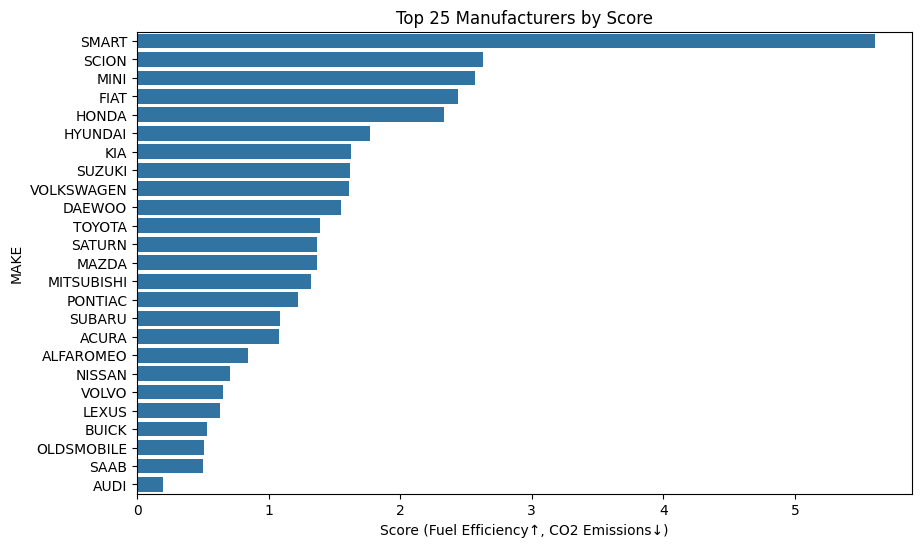

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x="score", y="MAKE", data=sorted_best_make)
plt.title("Top 25 Manufacturers by Score")
plt.xlabel("Score (Fuel Efficiency↑, CO2 Emissions↓)")
plt.ylabel("MAKE")
plt.show()

#### 정규화 전후 박스플롯 비교

#### Before : 
연비(comb)와 배출량(emission)의 단위 크기 차이로 인해 두 변수를 직접 비교하기 어려움

#### After : 
Z-Score를 적용하여 평균을 0, 표준편차를 1로 정규화함
동일한 스케일에서 분포 비교 가능

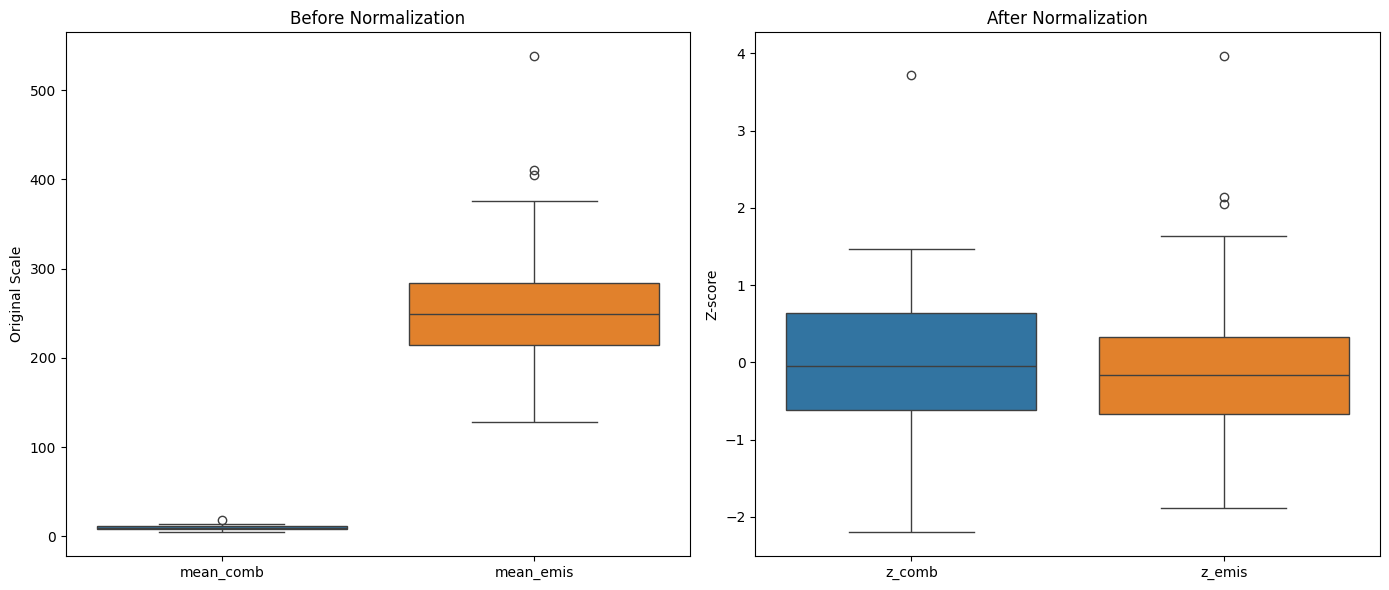

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 정규화 전 박스플롯
sns.boxplot(data=make_mean[["mean_comb", "mean_emis"]], ax=axes[0])
axes[0].set_title("Before Normalization")
axes[0].set_ylabel("Original Scale")

# 정규화 후 박스플롯
sns.boxplot(data=make_mean[["z_comb", "z_emis"]], ax=axes[1])
axes[1].set_title("After Normalization")
axes[1].set_ylabel("Z-score")

plt.tight_layout()
plt.show()